In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [12]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans:
    def __init__(self, num_clusters=2, max_iterations=100):
        self.num_clusters = num_clusters
        self.max_iterations = max_iterations

    def fit(self, data):
        # Kompleksitas waktu: O(k), dimana k adalah jumlah clusters
        self.centroids = data[np.random.choice(range(len(data)), self.num_clusters, replace=False)]

        for _ in range(self.max_iterations):
            # Kompleksitas waktu: O(k * n * d), di mana n adalah jumlah data, dan d adalah dimensi data
            clusters = [[] for _ in range(self.num_clusters)]
            for point in data:
                # Kompleksitas waktu: O(k * d)
                distances = [euclidean_distance(point, centroid) for centroid in self.centroids]
                # Kompleksitas waktu: O(k)
                cluster = np.argmin(distances)
                # Kompleksitas waktu: O(1)
                clusters[cluster].append(point)
                
            for i in range(self.num_clusters):
                # Kompleksitas waktu: O(d * n)
                if len(clusters[i]) > 0:
                    # Kompleksitas waktu: O(d * n)
                    self.centroids[i] = np.mean(clusters[i], axis=0)

    def predict(self, data):
        # Kompleksitas waktu: O(k * n * d)
        predictions = []
        for point in data:
            # Kompleksitas waktu: O(k * d)
            distances = [euclidean_distance(point, centroid) for centroid in self.centroids]
            # Kompleksitas waktu: O(k)
            cluster = np.argmin(distances)
            # Kompleksitas waktu: O(1)
            predictions.append(cluster)
        # Kompleksitas waktu: O(n)
        return np.array(predictions)

In [17]:
features, labels = make_blobs(
    n_samples=200,
    random_state=42
)

model = KMeans(num_clusters=5)
model.fit(features)

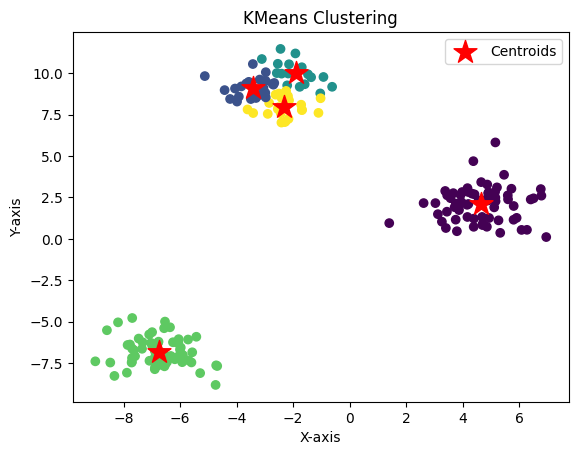

In [18]:
predictions = model.predict(features)

plt.scatter(features[:, 0], features[:, 1], c=predictions, cmap='viridis')
plt.scatter(np.array(model.centroids)[:, 0], np.array(model.centroids)[:, 1], marker='*', s=300, c='red', label='Centroids')
plt.title('KMeans Clustering')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()